In [1]:
import os


from morphopy.neurontree import NeuronTree as nt
from morphopy.neurontree.utils import get_standardized_swc

import os
import pandas as pd
import numpy as np
import networkx as nx
from scipy.io import savemat

from graph_utils import get_barcode


## plotting ###

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Excitatory data
### plot the data

In [16]:
from rw_utils import load_neurons
#load in data
neurons = load_neurons('./data/M1_exc_data/neurons/', sort=False)

In [17]:
labels = pd.read_csv('./data/M1_exc_data/meta_data_m_type_label.csv')['m-type2'].values

In [32]:
np.random.seed(17)
n_samples = 3
t_index = np.random.choice(np.where(labels == 'tufted')[0], size=n_samples, replace=False)
u_index = np.random.choice(np.where(labels == 'untufted')[0], size=n_samples, replace=False)
o_index = np.random.choice(np.where(labels == 'other')[0], size=n_samples, replace=False) 

type_indices = np.concatenate((t_index, u_index, o_index))

In [19]:
colors ={'untufted': '#0d5d7f',
    'other': '#55b7a6', 
        'tufted': '#338b5f'
         }

In [55]:
sns.set_context('notebook')

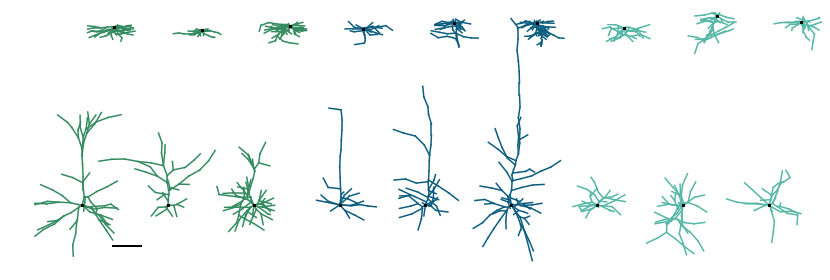

In [33]:

fig, axes = plt.subplots(1,9, sharex=True, sharey=True, figsize=(12,4))

for k, ix_ in enumerate(type_indices):
    
    c = colors[labels[ix_]]
    neurons[ix_].draw_2D(ax=axes[k], dendrite_color=c, projection='xz')
    axes[k].axis('off')
    axes[k].set_aspect('equal')
    axes[k].scatter(0, 0, c='k', marker='s', zorder=10, s=8)
    
    inset_axis = axes[k].inset_axes([.6,.7,.4,.4])
    neurons[ix_].draw_2D(ax=inset_axis, dendrite_color=c, projection='xy')
    inset_axis.scatter(0, 0, c='k', marker='s', zorder=10, s=8)
    inset_axis.axis('off')
    inset_axis.set_aspect('equal')
    
    if k == 1:
        axes[1].plot([-2,-1], [-1.5,-1.5], c='k', linewidth=2)
#         axes[1].plot([-2,-2], [-2,-1], c='k', linewidth=2)
#         inset_axis.plot([-2,-1], [-1,-1], c='k', linewidth=2)
#         inset_axis.plot([-2,-2], [-1,0], c='k', linewidth=2)

plt.tight_layout()
fig.subplots_adjust(wspace=-.45)
plt.savefig('./pics/ICML/camera-ready/Fig2/Fig2_exc.svg', format='svg')

# Inhibitory data

### plot the data

In [2]:
from rw_utils import load_neurons
import os

neurons = load_neurons('./data/M1_inh_data/neurons/full/', sort=False)

In [3]:
meta_data = pd.read_csv('./data/M1_inh_data/meta_data.csv')

# get true labels
labels = meta_data['RNA family'].values
labels[labels == 'n.a.'] = -100
labels[labels == 'Sncg'] = 'Vip'


In [14]:
np.random.seed(18)
n_samples = 2
sst_index = np.random.choice(np.where(labels == 'Sst')[0], size=n_samples, replace=False)
vip_index = np.random.choice(np.where(labels == 'Vip')[0], size=n_samples, replace=False)
pv_index = np.random.choice(np.where(labels == 'Pvalb')[0], size=n_samples, replace=False) 
lamp5_index = np.random.choice(np.where(labels == 'Lamp5')[0], size=n_samples, replace=False) 

type_indices = np.concatenate((sst_index, pv_index, vip_index, lamp5_index))

In [5]:
colors = {'Sst':   '#fd9e2b', 
          'Pvalb': '#e0285d', 
          'Vip':   '#aa369a', 
          'Lamp5': '#fda389'}

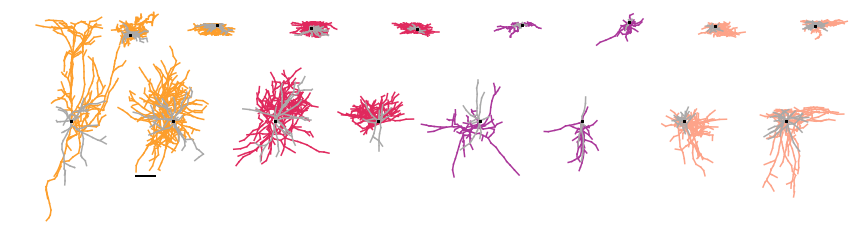

In [15]:

fig, axes = plt.subplots(1,8, sharex=True, sharey=True, figsize=(12,4))

for k, ix_ in enumerate(type_indices):
    
    c = colors[labels[ix_]]
    neurons[ix_].draw_2D(ax=axes[k], axon_color=c, projection='xz')
    axes[k].axis('off')
    axes[k].set_aspect('equal')
    axes[k].scatter(0, 0, c='k', marker='s', zorder=10, s=8)
    if k == 0:
        inset_axis = axes[k].inset_axes([.8,.7,.4,.4])
    else: 
        inset_axis = axes[k].inset_axes([.6,.7,.4,.4])
    
    neurons[ix_].draw_2D(ax=inset_axis, axon_color=c, projection='xy')
    inset_axis.scatter(0, 0, c='k', marker='s', zorder=10, s=8)
    inset_axis.axis('off')
    inset_axis.set_aspect('equal')
    
    if k == 1:
        axes[1].plot([-2,-1], [-3,-3], c='k', linewidth=2)
#         inset_axis.plot([-2,-1], [-1.5,-1.5], c='k', linewidth=3)

plt.tight_layout()
fig.subplots_adjust(wspace=-.2)
plt.savefig('./pics/ICML/camera-ready/Fig2/Fig2_inh.svg', format='svg')